In [1]:
import torch
torch.cuda.memory_cached()
import os
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pandas as pd
from torch.utils.data import Dataset, DataLoader, Subset
# from torchvision import transforms
from PIL import Image
from torchvision import models, transforms

from sklearn.model_selection import train_test_split
import optuna
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision.transforms.functional import to_tensor, to_pil_image
import best_modelo_general as bmg
import best_modelo_general_colon as bmgc
import best_modelo_general_lung as bmgl
import best_modelo_general_gastrointestinal as bmgg
import best_modelo_general_oral as bmgo

# Aca va el optmizador de profundidad
import opt_deep_analysis as opt_deep

sys.path.append("C:/Users/Matias/Desktop/Tesis/Tesis-Codes/utils")
import creacion_df_torch as qol



dataset_dir = r"C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasias"

# Preparar datos
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
df = qol.crear_dataframe_binario(dataset_dir, filtro_cancer='all')
train_loader, val_loader, test_loader = qol.prepare_data_loaders(df, batch_size=80, m_type='bin')




#Preparamos
import os
import pandas as pd

# Ruta al directorio del dataset
dataset_dir = r"C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasias"

    


df['Combinaciones'] = df['etiqueta'].astype(str) + "_" + df['tipo_cancer'].astype(str)
# Preparar los DataLoaders (usando el DataFrame binario como ejemplo)
# Guardar el DataFrame de prueba
_, test_val_df = train_test_split(df, test_size=0.3, random_state=46, stratify=df['Combinaciones'])
_, test_df = train_test_split(test_val_df, test_size=0.33, random_state=46, stratify=test_val_df['Combinaciones'])



# Seleccionar una imagen del conjunto de prueba
imagen_prueba = test_df.sample(n=1).iloc[0]
ruta_imagen_prueba = imagen_prueba['ruta']

print(f"Imagen seleccionada: {ruta_imagen_prueba}")


c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\cuda\memory.py:444: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Matias\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\cuda\memory.py:444: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


test_df:
                                                    ruta etiqueta  \
30500  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno   
4310   C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno   
34836  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno   
18660  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno   
3728   C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno   
...                                                  ...      ...   
318    C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno   
39712  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno   
19588  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno   
31988  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno   
17175  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno   

            tipo_cancer             Combinaciones  
30500             colon             benigno_colon  
4310              colon             maligno_colon  
34836 

In [2]:
test_df

,ruta,etiqueta,tipo_cancer,Combinaciones
30500,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,benigno,colon,benigno_colon
4310,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,maligno,colon,maligno_colon
34836,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,benigno,gastrointestinal,benigno_gastrointestinal
18660,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,maligno,lung,maligno_lung
3728,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,maligno,colon,maligno_colon
...,...,...,...,...
318,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,maligno,colon,maligno_colon
39712,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,benigno,lung,benigno_lung
19588,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,maligno,oral,maligno_oral
31988,C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...,benigno,colon,benigno_colon


# Creacion Dataframes Tipos de Cancer

In [3]:
#Creamos el dataframe de colon quitando los valores de ruta de test_df

df_colon = qol.crear_dataframe_binario(dataset_dir, filtro_cancer='colon')
df_colon = df_colon[~df_colon['ruta'].isin(test_df['ruta'])]
#Cargamos los loaders
train_loader_colon, val_loader_colon, test_loader_colon = qol.prepare_data_loaders_tipos(df_colon, test_df[test_df['tipo_cancer']=='colon'], batch_size=80, m_type='bin')



df_pulmon = qol.crear_dataframe_binario(dataset_dir, filtro_cancer='lung')
df_pulmon = df_pulmon[~df_pulmon['ruta'].isin(test_df['ruta'])]
train_loader_pulmon, val_loader_pulmon, test_loader_pulmon = qol.prepare_data_loaders_tipos(df_pulmon, test_df[test_df['tipo_cancer']=='lung'], batch_size=40, m_type='bin')


df_gastrointestinal = qol.crear_dataframe_binario(dataset_dir, filtro_cancer='gastrointestinal')
df_gastrointestinal = df_gastrointestinal[~df_gastrointestinal['ruta'].isin(test_df['ruta'])]
train_loader_gastrointestinal, val_loader_gastrointestinal, test_loader_gastrointestinal = qol.prepare_data_loaders_tipos(df_gastrointestinal, test_df[test_df['tipo_cancer']=='gastrointestinal'], batch_size=40, m_type='bin')

df_oral = qol.crear_dataframe_binario(dataset_dir, filtro_cancer='oral')
df_oral = df_oral[~df_oral['ruta'].isin(test_df['ruta'])]
train_loader_oral, val_loader_oral, test_loader_oral = qol.prepare_data_loaders_tipos(df_oral, test_df[test_df['tipo_cancer']=='oral'], batch_size=20, m_type='bin')




test_df:
                                                    ruta etiqueta tipo_cancer  \
30500  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno       colon   
4310   C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno       colon   
3728   C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno       colon   
29281  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno       colon   
33746  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno       colon   
...                                                  ...      ...         ...   
3282   C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno       colon   
750    C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno       colon   
29936  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno       colon   
318    C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  maligno       colon   
31988  C:/Users/Matias/Desktop/Tesis/Dataset_Neoplasi...  benigno       colon   

       Combinacion

In [4]:
#Contamos los diferentes valores de test_df
test_df['tipo_cancer'].value_counts() 

tipo_cancer
lung                1485
oral                1335
colon                990
gastrointestinal     796
Name: count, dtype: int64

## Matriz de confusión

### Redes preentrenadas

# Modelos Binarios Cancer-No Cancer

## Modelo General 4 tipos de Cancer

### Mejor modelo iteraciones

In [5]:

# Entrenar modelo
'''model_bmg = bmg.train_model(device, train_loader, val_loader)
#Cargamos el modelo si ya lo tenemos entrenado
# Guardar el estado del diccionario de cada modelo
torch.save(model_bmg, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmg.pth')
torch.save(model_bmg, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmg.pt')

# Evaluar modelo
test_accuracy, test_loss = qol.evaluate_model(device, model_bmg, test_loader)
print(f'Final Test Accuracy: {test_accuracy:.4f}')


try:
    # Ejemplo de uso
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader, test_loader)
    print(f'Final Validation Metrics: Accuracy={val_metrics[0]:.4f}, Recall={val_metrics[1]:.4f}, Precision={val_metrics[2]:.4f}, F1={val_metrics[3]:.4f}')
    print(f'Final Test Metrics: Accuracy={test_metrics[0]:.4f}, Recall={test_metrics[1]:.4f}, Precision={test_metrics[2]:.4f}, F1={test_metrics[3]:.4f}')
except:
    print('error')'''

"model_bmg = bmg.train_model(device, train_loader, val_loader)\n#Cargamos el modelo si ya lo tenemos entrenado\n# Guardar el estado del diccionario de cada modelo\ntorch.save(model_bmg, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmg.pth')\ntorch.save(model_bmg, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmg.pt')\n\n# Evaluar modelo\ntest_accuracy, test_loss = qol.evaluate_model(device, model_bmg, test_loader)\nprint(f'Final Test Accuracy: {test_accuracy:.4f}')\n\n\ntry:\n    # Ejemplo de uso\n    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader, test_loader)\n    print(f'Final Validation Metrics: Accuracy={val_metrics[0]:.4f}, Recall={val_metrics[1]:.4f}, Precision={val_metrics[2]:.4f}, F1={val_metrics[3]:.4f}')\n    print(f'Final Test Metrics: Accuracy={test_metrics[0]:.4f}, Recall={test_metrics[1]:.4f}, Precision={test_metrics[2]:.4f}, F1={test_metrics[3]:.4f}')\nexcept:\n    print('error')"

In [6]:


# Verificar si hay una GPU disponible y mover el modelo al dispositivo adecuado
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el modelo completo desde el archivo
model_bmg = torch.load('C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmg.pth')
model_bmg.to(device)

# Poner el modelo en modo de evaluación
model_bmg.eval()
# Evaluar el modelo cargado
# Evaluar modelo cargado
try:
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader, test_loader)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss  = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss  = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')

    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')

    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')








Validation Metrics:
  Accuracy: 0.9477
  Recall: 0.9669
  Precision: 0.9509
  F1 Score: 0.9588
  Confusion Matrix:
[[3173  294]
 [ 195 5689]]
  Loss (avg): 0.2608

Test Metrics:
  Accuracy: 0.9494
  Recall: 0.9689
  Precision: 0.9515
  F1 Score: 0.9602
  Confusion Matrix:
[[1565  143]
 [  90 2808]]
  Loss (avg): 0.2715
Validation Accuracy: 0.9477
Validation Loss (avg): 0.2608
Test Accuracy: 0.9494
Test Loss (avg): 0.2715
Test Recall: 0.9689
Test Precision: 0.9515
Test F1: 0.9602
Test Confusion Matrix:
[[1565  143]
 [  90 2808]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, ruta, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función imprime y grafica la matriz de confusión.
    La normalización puede aplicarse estableciendo normalize=True.
    """
    plt.figure(figsize=(8, 8))
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm, decimals=3)
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.savefig(f'{ruta}/{title}.png', dpi=600, bbox_inches='tight')
    plt.show()


Matriz de confusión sin normalización


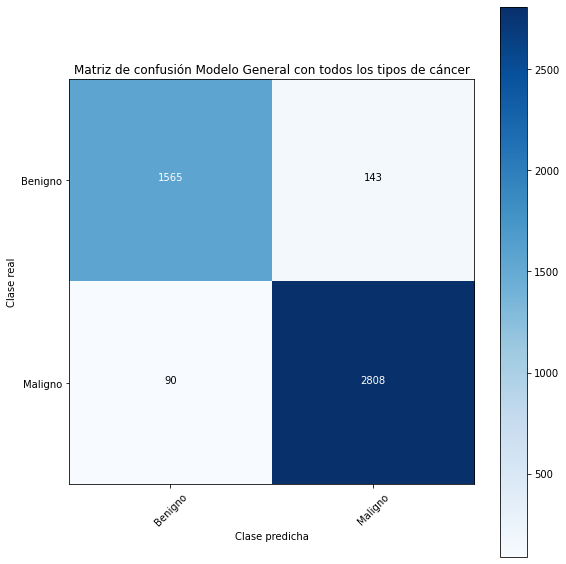

In [ ]:
# Matriz de confusión proporcionada
conf_matrix = np.array([[1565, 143],[90, 2808]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo General en los cuatro tipos de cáncer') 

## Modelo Binario Colon

In [12]:

# Entrenar modelo
'''model_bmgc= bmgc.train_model(device, train_loader_colon, val_loader_colon)
torch.save(model_bmgc, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgc.pth')
torch.save(model_bmgc, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgc.pt')
'''
model_bmgc = torch.load('C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgc.pth')
model_bmgc.to(device)

# Poner el modelo en modo de evaluación
model_bmgc.eval()



try:
    test_accuracy = qol.evaluate_model(device, model_bmgc, test_loader_colon)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmgc, val_loader_colon, test_loader_colon)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

print('Modelo General')
try:
    test_accuracy = qol.evaluate_model(device, model_bmg, test_loader_colon)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader_colon, test_loader_colon)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss, val_loss_list = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss, test_loss_list = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    print(f'Validation Loss List: {val_loss_list}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Loss List: {test_loss_list}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')


Test Accuracy: 0.9990
Validation Metrics:
  Accuracy: 0.9989
  Recall: 0.9978
  Precision: 1.0000
  F1 Score: 0.9989
  Confusion Matrix:
[[1351    0]
 [   3 1349]]
  Loss (avg): 0.0060

Test Metrics:
  Accuracy: 0.9990
  Recall: 1.0000
  Precision: 0.9980
  F1 Score: 0.9990
  Confusion Matrix:
[[494   1]
 [  0 495]]
  Loss (avg): 0.0020
Validation Accuracy: 0.9989
Validation Loss (avg): 0.0060
Test Accuracy: 0.9990
Test Loss (avg): 0.0020
Test Recall: 1.0000
Test Precision: 0.9980
Test F1: 0.9990
Test Confusion Matrix:
[[494   1]
 [  0 495]]
Modelo General
Test Accuracy: 0.9869
Validation Metrics:
  Accuracy: 0.9978
  Recall: 0.9956
  Precision: 1.0000
  F1 Score: 0.9978
  Confusion Matrix:
[[1351    0]
 [   6 1346]]
  Loss (avg): 0.0098

Test Metrics:
  Accuracy: 0.9869
  Recall: 0.9758
  Precision: 0.9979
  F1 Score: 0.9867
  Confusion Matrix:
[[494   1]
 [ 12 483]]
  Loss (avg): 0.0381
Error: not enough values to unpack (expected 7, got 6)


Matriz de confusión sin normalización


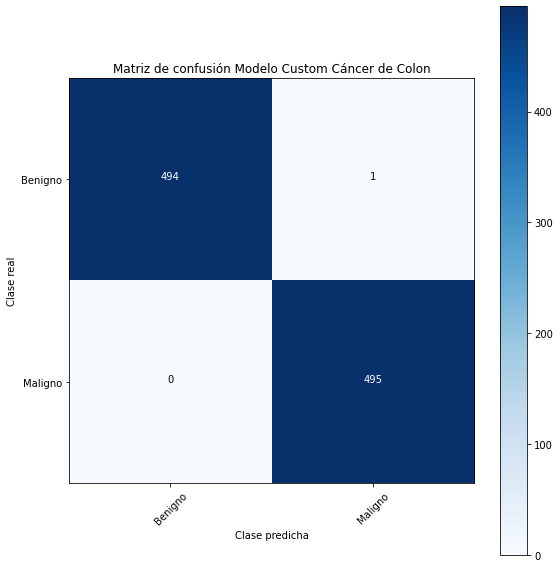

Matriz de confusión sin normalización


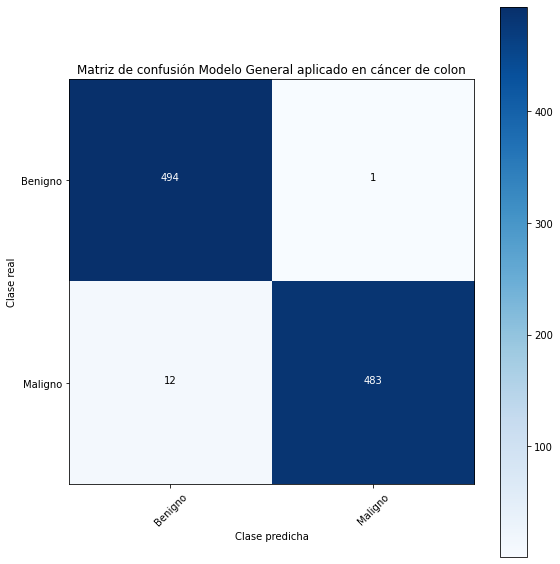

In [19]:
conf_matrix = np.array([[494, 1],[0, 495]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo Custom Cáncer de Colon') 

# Matriz de confusión proporcionada
conf_matrix = np.array([[494, 1],[12, 483]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo General aplicado en cáncer de colon') 

### Redes preentrenadas

## Modelo Binario Pulmon

In [11]:

'''model_bmgl= bmgl.train_model(device, train_loader_pulmon, val_loader_pulmon)
torch.save(model_bmgl, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgl.pth')
torch.save(model_bmgl, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgl.pt')'''


model_bmgl = torch.load('C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgl.pth')

model_bmgl.to(device)

model_bmgl.eval()

try:
    test_accuracy = qol.evaluate_model(device, model_bmgl, test_loader_pulmon)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmgl, val_loader_pulmon, test_loader_pulmon)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

print('Modelo General')
try:
    test_accuracy = qol.evaluate_model(device, model_bmg, test_loader_pulmon)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader_pulmon, test_loader_pulmon)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss  = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss  = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

Test Accuracy: 1.0000
Validation Metrics:
  Accuracy: 0.9985
  Recall: 0.9993
  Precision: 0.9985
  F1 Score: 0.9989
  Confusion Matrix:
[[1348    4]
 [   2 2701]]
  Loss (avg): 0.0131

Test Metrics:
  Accuracy: 1.0000
  Recall: 1.0000
  Precision: 1.0000
  F1 Score: 1.0000
  Confusion Matrix:
[[495   0]
 [  0 990]]
  Loss (avg): 0.0000
Validation Accuracy: 0.9985
Validation Loss (avg): 0.0131
Test Accuracy: 1.0000
Test Loss (avg): 0.0000
Test Recall: 1.0000
Test Precision: 1.0000
Test F1: 1.0000
Test Confusion Matrix:
[[495   0]
 [  0 990]]
Modelo General
Test Accuracy: 0.9973
Validation Metrics:
  Accuracy: 0.9985
  Recall: 0.9989
  Precision: 0.9989
  F1 Score: 0.9989
  Confusion Matrix:
[[1349    3]
 [   3 2700]]
  Loss (avg): 0.0023

Test Metrics:
  Accuracy: 0.9973
  Recall: 0.9980
  Precision: 0.9980
  F1 Score: 0.9980
  Confusion Matrix:
[[493   2]
 [  2 988]]
  Loss (avg): 0.0444
Validation Accuracy: 0.9985
Validation Loss (avg): 0.0023
Test Accuracy: 0.9973
Test Loss (avg): 0

Matriz de confusión sin normalización


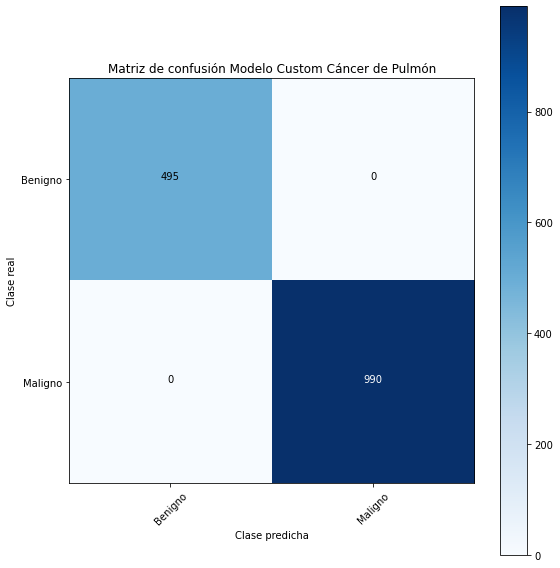

Matriz de confusión sin normalización


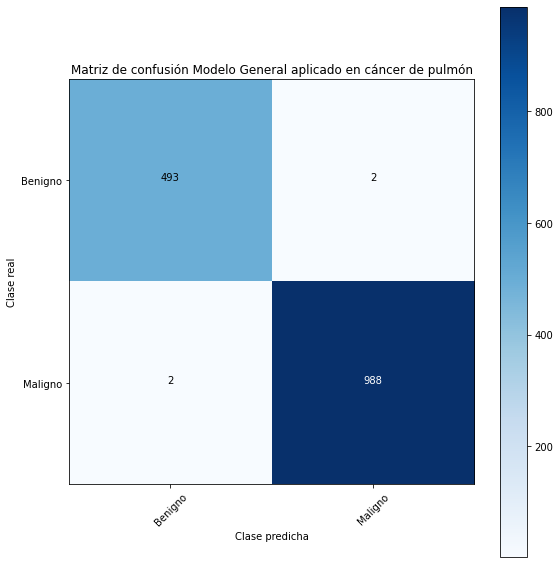

In [14]:
conf_matrix = np.array([[495, 0],[0, 990]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo Custom Cáncer de Pulmón') 

# Matriz de confusión proporcionada
conf_matrix = np.array([[493, 2],[2, 988]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo General aplicado en cáncer de pulmón') 

## Modelo Binario Gastrointestinal

In [12]:

# Entrenar modelo
'''model_bmgg= bmgg.train_model(device, train_loader_gastrointestinal, val_loader_gastrointestinal)
torch.save(model_bmgg, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgg.pth')
torch.save(model_bmgg, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgg.pt')'''



model_bmgg = torch.load('C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgg.pth')

model_bmgg.to(device)

model_bmgg.eval()

try:
    test_accuracy = qol.evaluate_model(device, model_bmgg, test_loader_gastrointestinal)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmgg, val_loader_gastrointestinal, test_loader_gastrointestinal)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss  = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss  = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Loss List: {test_loss_list}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

print('Modelo General')
try:
    test_accuracy = qol.evaluate_model(device, model_bmg, test_loader_gastrointestinal)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader_gastrointestinal, test_loader_gastrointestinal)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

Test Accuracy: 0.9636
Validation Metrics:
  Accuracy: 0.9618
  Recall: 0.9695
  Precision: 0.9545
  F1 Score: 0.9619
  Confusion Matrix:
[[1043   50]
 [  33 1049]]
  Loss (avg): 0.2214

Test Metrics:
  Accuracy: 0.9636
  Recall: 0.9646
  Precision: 0.9622
  F1 Score: 0.9634
  Confusion Matrix:
[[385  15]
 [ 14 382]]
  Loss (avg): 0.2081
Validation Accuracy: 0.9618
Validation Loss (avg): 0.2214
Test Accuracy: 0.9636
Test Loss (avg): 0.2081
Error: name 'test_loss_list' is not defined
Modelo General
Test Accuracy: 0.9724
Validation Metrics:
  Accuracy: 0.9894
  Recall: 0.9843
  Precision: 0.9944
  F1 Score: 0.9893
  Confusion Matrix:
[[1087    6]
 [  17 1065]]
  Loss (avg): 0.0313

Test Metrics:
  Accuracy: 0.9724
  Recall: 0.9672
  Precision: 0.9770
  F1 Score: 0.9721
  Confusion Matrix:
[[391   9]
 [ 13 383]]
  Loss (avg): 0.1283
Validation Accuracy: 0.9894
Validation Loss (avg): 0.0313
Test Accuracy: 0.9724
Test Loss (avg): 0.1283
Test Recall: 0.9672
Test Precision: 0.9770
Test F1: 0.9

Matriz de confusión sin normalización


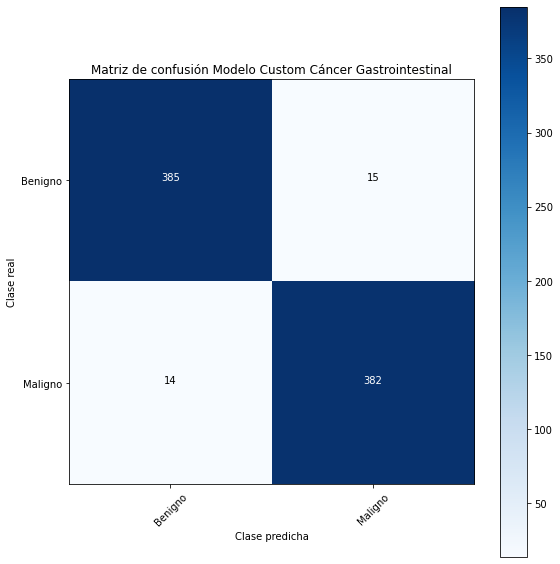

Matriz de confusión sin normalización


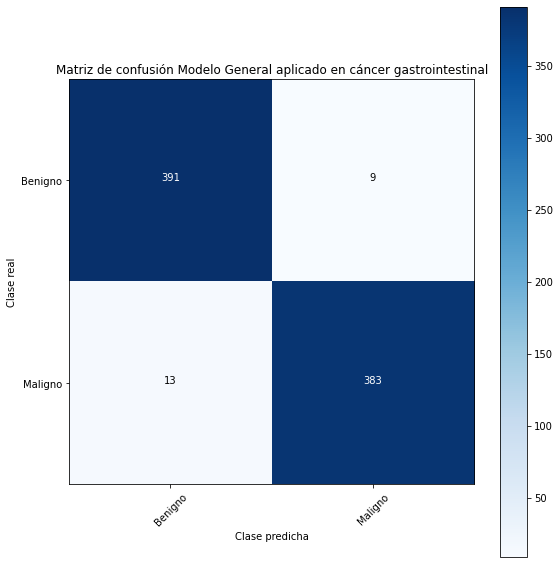

In [18]:
conf_matrix = np.array([[385, 15],[14, 382]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo Custom Cáncer Gastrointestinal') 

# Matriz de confusión proporcionada
conf_matrix = np.array([[391, 9],[13, 383]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo General aplicado en cáncer gastrointestinal') 

### Redes preentrenadas

## Modelo Binario Oral

In [16]:

# Entrenar modelo
'''model_bmgo= bmgo.train_model(device, train_loader_oral, val_loader_oral)
torch.save(model_bmgo, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgo.pth')
torch.save(model_bmgo, 'C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgo.pt')'''




model_bmgo = torch.load('C:/Users/Matias/Desktop/Tesis/Tesis-Codes/Best_Optuna_Models/model_bmgo.pth')

model_bmgo.to(device)

model_bmgo.eval()

try:
    test_accuracy = qol.evaluate_model(device, model_bmgo, test_loader_oral)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmgo, val_loader_oral, test_loader_oral)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

print('Modelo General')
try:
    test_accuracy = qol.evaluate_model(device, model_bmg, test_loader_oral)
    # Evaluar el modelo cargado
    val_metrics, test_metrics = qol.evaluate_model_with_metrics(device, model_bmg, val_loader_oral, test_loader_oral)
    
    # Acceder a los valores para validación
    val_accuracy, val_recall, val_precision, val_f1, val_cm, val_loss = val_metrics
    
    # Acceder a los valores para test
    test_accuracy, test_recall, test_precision, test_f1, test_cm, test_loss = test_metrics

    # Imprimir las métricas y listas de pérdidas
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Validation Loss (avg): {val_loss:.4f}')
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Loss (avg): {test_loss:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test F1: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    

except Exception as e:
    print(f'Error: {e}')

Test Accuracy: 0.8637
Validation Metrics:
  Accuracy: 0.8721
  Recall: 0.9280
  Precision: 0.9065
  F1 Score: 0.9171
  Confusion Matrix:
[[ 600  266]
 [ 200 2578]]
  Loss (avg): 0.5549

Test Metrics:
  Accuracy: 0.8637
  Recall: 0.9145
  Precision: 0.9073
  F1 Score: 0.9109
  Confusion Matrix:
[[223  95]
 [ 87 930]]
  Loss (avg): 0.6317
Validation Accuracy: 0.8721
Validation Loss (avg): 0.5549
Test Accuracy: 0.8637
Test Loss (avg): 0.6317
Test Recall: 0.9145
Test Precision: 0.9073
Test F1: 0.9109
Test Confusion Matrix:
[[223  95]
 [ 87 930]]
Modelo General
Test Accuracy: 0.8547
Validation Metrics:
  Accuracy: 0.9591
  Recall: 0.9816
  Precision: 0.9653
  F1 Score: 0.9734
  Confusion Matrix:
[[ 768   98]
 [  51 2727]]
  Loss (avg): 0.1981

Test Metrics:
  Accuracy: 0.8547
  Recall: 0.9381
  Precision: 0.8793
  F1 Score: 0.9077
  Confusion Matrix:
[[187 131]
 [ 63 954]]
  Loss (avg): 0.7826
Validation Accuracy: 0.9591
Validation Loss (avg): 0.1981
Test Accuracy: 0.8547
Test Loss (avg): 0

Matriz de confusión sin normalización


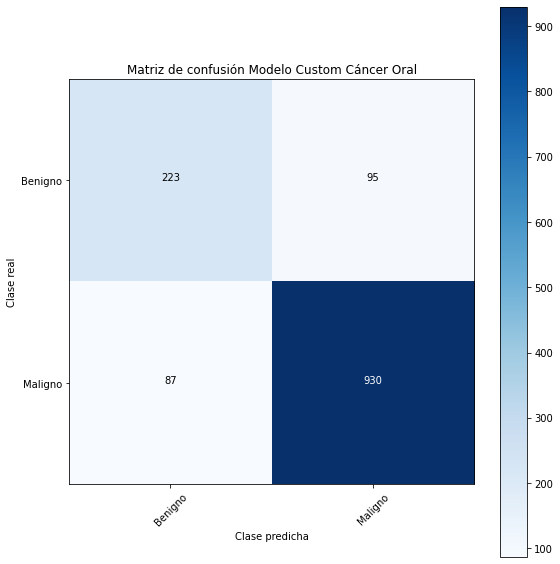

Matriz de confusión sin normalización


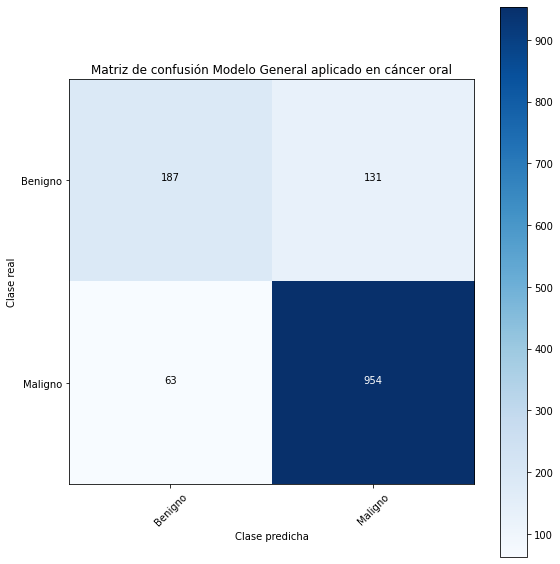

In [17]:
conf_matrix = np.array([[223, 95],[87, 930]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo Custom Cáncer Oral') 

# Matriz de confusión proporcionada
conf_matrix = np.array([[187, 131],[63, 954]])

# Etiquetas de las clases (ajustar según tu caso)
class_names = ['Benigno', 'Maligno']

# Ruta donde se guardará el gráfico
ruta = "C:/Users/Matias/Desktop/Tesis/Matrices de Confusion"  # Cambia esto a la ruta de tu preferencia

# Llamada a la función para graficar
plot_confusion_matrix(conf_matrix, classes=class_names, ruta=ruta, normalize=False, title='Matriz de confusión Modelo General aplicado en cáncer oral') 